##  COMP24112 Lab 2: News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (0), "crude" (1), "trade" (2) and "interest" (3).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [23]:
# Hristo Mihaylov
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To handle the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [24]:
print(data[41,:]) # A sparse row vector; the output will be the non-zero indices and their values.
print(data[41,:].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [25]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [26]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [27]:
print(labels[i])

0


For instance, by running

In [28]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [29]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [30]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [ 93 297 367 570 543 450 717 636 741 752]
Samples:   (0, 13)	1
  (0, 15)	3
  (0, 16)	2
  (0, 19)	6
  (0, 21)	4
  (0, 22)	2
  (0, 23)	4
  (0, 92)	1
  (0, 117)	1
  (0, 236)	1
  (0, 1787)	1
  (0, 5703)	1
  (0, 6229)	1
  (1, 5)	14
  (1, 14)	1
  (1, 23)	1
  (1, 30)	6
  (1, 35)	1
  (1, 37)	1
  (1, 42)	8
  (1, 58)	2
  (1, 60)	3
  (1, 70)	14
  (1, 79)	1
  (1, 84)	4
  :	:
  (8, 1870)	1
  (8, 2084)	1
  (8, 2565)	2
  (8, 2936)	1
  (8, 3030)	1
  (8, 3165)	2
  (8, 3266)	1
  (8, 3432)	2
  (8, 3817)	1
  (9, 5)	1
  (9, 13)	1
  (9, 75)	1
  (9, 98)	3
  (9, 252)	1
  (9, 320)	2
  (9, 332)	2
  (9, 340)	2
  (9, 728)	1
  (9, 814)	1
  (9, 984)	1
  (9, 1229)	2
  (9, 1539)	1
  (9, 1588)	1
  (9, 2988)	3
  (9, 6081)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighbour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you are allowed to use the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples or features**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.
Each experiment below is expected to take no more than 2 minutes to run.

In [31]:
import scipy.stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric="euclidean", k=1):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    # Calculate an m x n distance matrix.
    pairwise_distance = cdist(test_samples, training_data, metric)
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    nearest_neighbours = np.argsort(pairwise_distance, axis=1)[:,0:k]
    
    # Look up the classes corresponding to each index.
    nearest_labels = training_labels[nearest_neighbours]
    
    # Return the most frequent class on each row.
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    
    # Since the method is k-NN classification, we should find the mode.
    return np.squeeze(scipy.stats.mode(nearest_labels, axis=1).mode)

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.

Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies. Print out the mean and standard deviation.

In [32]:
# Your code goes here
def classifier(k = 1, metric="euclidean"):
    train_indices = sample_indices(labels, 80, 80, 80, 80)
    test_indices = np.setdiff1d(np.arange(800), train_indices, assume_unique = True)
    res = knn_classify(data[test_indices], data[train_indices], labels[train_indices], metric, k)
    number_true = np.count_nonzero(labels[test_indices]==res)
    accuracy = number_true/(4*120) # we divide by 4*120 = 480 since we want to test (on the testing set)
    return accuracy


def measure_acc(metric="euclidean"):
    accuracies = list()
    for i in range(20):
        acc = classifier(5, metric)
        accuracies.append(acc)
    mean = np.mean(accuracies)
    print("The mean using 5-NN classifier is: " + str(mean))
    deviation = np.std(accuracies)
    print("The standard deviation using 5-NN classifier is: " + str(deviation))


print("Using Euclidean distance:\n")
measure_acc("euclidean")

Using Euclidean distance:

The mean using 5-NN classifier is: 0.8723958333333334
The standard deviation using 5-NN classifier is: 0.01944180909720654


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

Print out the mean and standard deviation.

In [33]:
# Your code goes here
print("Using cosine distance:\n")
measure_acc("cosine")

Using cosine distance:

The mean using 5-NN classifier is: 0.9620833333333334
The standard deviation using 5-NN classifier is: 0.009023503261544876


Which distance measure gives better performance?

By using cosine distance, we obtain a higher mean accuracy and smaller standard deviation. Thus, cosine distance measure gives us better performance.

### Experiment 2

Using the distance measure that you found performs better in Experiment 1.

Randomly select 80 articles per class for training, and use the remaining articles for testing. Train your k-NN classifier with the neighbour number $k$ varying from 1 to 50.

For each values of $k$, repeat the training process by 20 trials and record the average training error rates and standard deviation.

Do the same for testing errors.

In [34]:
# Your code goes here
def train_classifier(k=1, metric="cosine"):
    train_indices = sample_indices(labels, 80, 80, 80, 80)
    res = knn_classify(data[train_indices], data[train_indices], labels[train_indices], metric, k)
    number_true = np.count_nonzero(labels[train_indices]==res)
    accuracy = number_true/(4*80)
    return accuracy


err_mean_test = list()
err_std_test = list()
err_mean_train = list()
err_std_train = list()
temp_train = list()
temp_test = list()

for x in range(50):
    k = x+1
    temp_train = list()
    temp_test = list()  
    for i in range(20):
        acc_train = train_classifier(k, "cosine")
        temp_train.append(1 - acc_train) 
        acc_test = classifier(k, "cosine")
        temp_test.append(1 - acc_test)
        
    err_mean_train.append(np.mean(temp_train))
    err_std_train.append(np.std(temp_train))
    err_mean_test.append(np.mean(temp_test))
    err_std_test.append(np.std(temp_test))
    
    print("Case k="+str(k))
    print("The mean error when training our model using " + str(k) + "-NN classifier is: " + str(err_mean_train[x]))
    print("The standard deviation error when training our model using " + str(k) + "-NN classifier is " + str(err_std_train[x]))
    print("The mean error when testing our model using " + str(k) + "-NN classifier is: " + str(err_mean_test[x]))
    print("The standard deviation error when testing our model using " + str(k) + "-NN classifier is " + str(err_std_test[x]))
    print()

Case k=1
The mean error when training our model using 1-NN classifier is: 0.0
The standard deviation error when training our model using 1-NN classifier is 0.0
The mean error when testing our model using 1-NN classifier is: 0.03645833333333333
The standard deviation error when testing our model using 1-NN classifier is 0.007725206757391308

Case k=2
The mean error when training our model using 2-NN classifier is: 0.016250000000000004
The standard deviation error when training our model using 2-NN classifier is 0.006139650845121411
The mean error when testing our model using 2-NN classifier is: 0.044374999999999984
The standard deviation error when testing our model using 2-NN classifier is 0.009107288747664345

Case k=3
The mean error when training our model using 3-NN classifier is: 0.016875
The standard deviation error when training our model using 3-NN classifier is 0.004980430453284139
The mean error when testing our model using 3-NN classifier is: 0.036562499999999984
The standard

Case k=23
The mean error when training our model using 23-NN classifier is: 0.040000000000000015
The standard deviation error when training our model using 23-NN classifier is 0.007629097259833566
The mean error when testing our model using 23-NN classifier is: 0.0471875
The standard deviation error when testing our model using 23-NN classifier is 0.00722514297244162

Case k=24
The mean error when training our model using 24-NN classifier is: 0.04625
The standard deviation error when training our model using 24-NN classifier is 0.009812699042567243
The mean error when testing our model using 24-NN classifier is: 0.04968750000000001
The standard deviation error when testing our model using 24-NN classifier is 0.007314695776692003

Case k=25
The mean error when training our model using 25-NN classifier is: 0.043125
The standard deviation error when training our model using 25-NN classifier is 0.00924915536684297
The mean error when testing our model using 25-NN classifier is: 0.049687499

Case k=45
The mean error when training our model using 45-NN classifier is: 0.06218749999999999
The standard deviation error when training our model using 45-NN classifier is 0.008777857440742583
The mean error when testing our model using 45-NN classifier is: 0.06354166666666665
The standard deviation error when testing our model using 45-NN classifier is 0.010088583344002706

Case k=46
The mean error when training our model using 46-NN classifier is: 0.0625
The standard deviation error when training our model using 46-NN classifier is 0.011223928122542484
The mean error when testing our model using 46-NN classifier is: 0.06572916666666669
The standard deviation error when testing our model using 46-NN classifier is 0.009782242805489711

Case k=47
The mean error when training our model using 47-NN classifier is: 0.061562500000000006
The standard deviation error when training our model using 47-NN classifier is 0.0106479531483755
The mean error when testing our model using 47-NN classi

Produce an error bar plot showing the training error rate for each $k$ here:

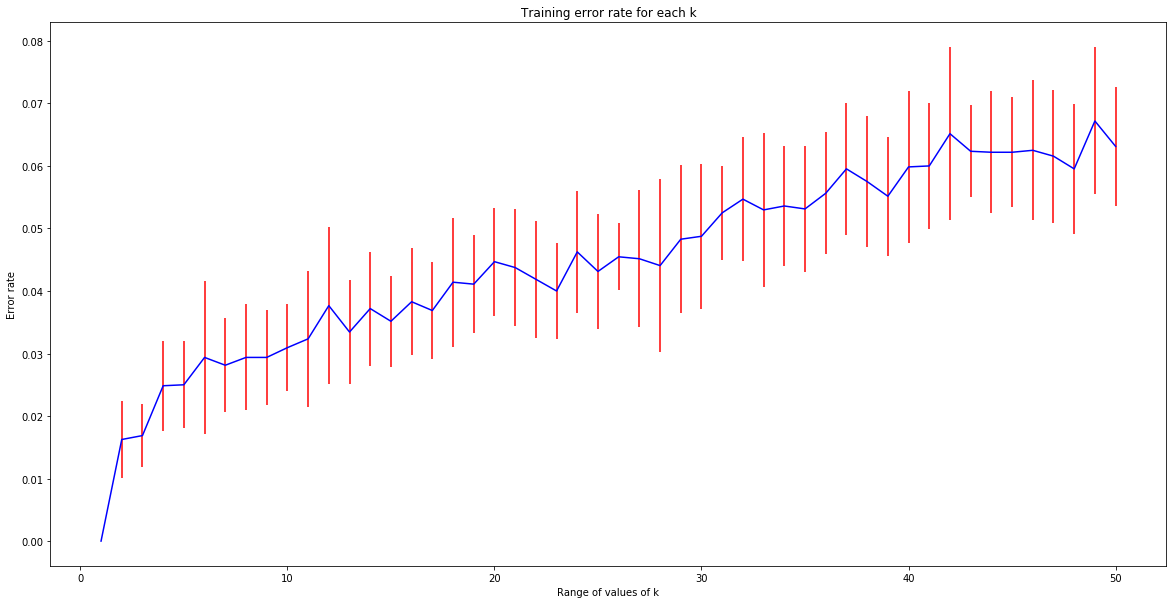

In [35]:
# Your code goes here
plt.figure(figsize=(20,10))
plt.errorbar(range(1,51), err_mean_train, yerr=err_std_train, ecolor='red', color='blue')
plt.title("Training error rate for each k")
plt.xlabel("Range of values of k")
plt.ylabel("Error rate")
plt.show()

Produce your testing error bar plot here:

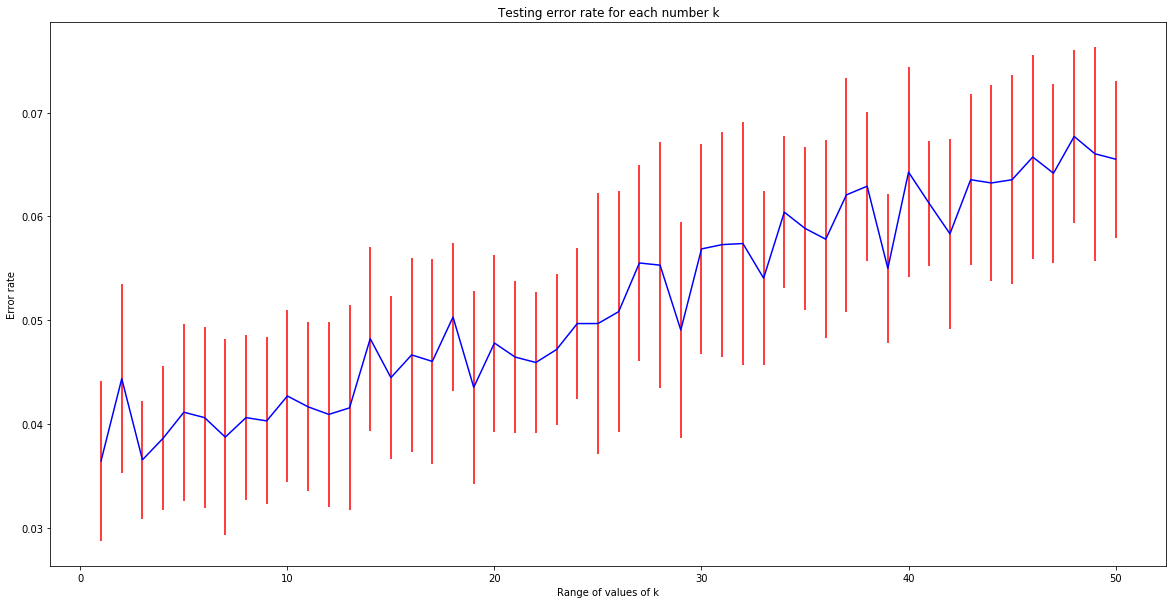

In [36]:
# Your code goes here
plt.figure(figsize=(20,10))
plt.errorbar(range(1,51), err_mean_test, yerr=err_std_test, ecolor='red', color='blue')
plt.title("Testing error rate for each number k")
plt.xlabel("Range of values of k")
plt.ylabel("Error rate")
plt.show()

**Remember that all graphs should have axis labels and a title.**

### Experiment 3

Compare three 5-NN classifiers using cosine distance.

First, randomly select 100 articles per class and keep these as your testing samples. Set all the remaining articles as the training set.

In [37]:
# Your code goes here
testing_indices = sample_indices(labels, 100, 100, 100, 100)
training_indices = np.setdiff1d(np.arange(800), testing_indices, assume_unique = True)

Then do the following:

(1) Train the first classifier using the traning set.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the label distribution, 4 confusion matrices, and the accuracy of the classifier.

In [38]:
# Your code goes here

def intro():
    print("All confusion matrices will be printed in the following patern:")
    print("[[ True Positives     False Positives]")
    print(" [ False Negatives    True Negatives ]]")
    print()
    print("True positives - correctly classified it the respective class.")
    print("False positives - the model classifies it in one class, but it belongs to another.")
    print("False negative - the model classifies it as not belonging to a certain class, while it does belong to this class.")
    print("True negatives - correctly classified as not part of the respective class.")
    print()
    


def training(testing_set, training_set):
    model = knn_classify(data[testing_set], data[training_set], labels[training_set], "cosine", 5)
    overal_accuracy = list()
    for i in range(4):  
        print("For class " + class_names[i] + ": ")  
        true_pos = np.logical_and(model == i, labels[testing_set] == i)
        false_neg = np.logical_and(model != i, labels[testing_set] == i)
        true_neg = np.logical_and(model != i, labels[testing_set] != i)
        false_pos = np.logical_and(model == i, labels[testing_set] != i) 
        TP = np.count_nonzero(true_pos == True)
        FN = np.count_nonzero(false_neg == True)
        TN = np.count_nonzero(true_neg == True)
        FP = np.count_nonzero(false_pos == True)
        overal_accuracy.append(TP)
        confusion_matrix = np.array([[TP, FP], [FN, TN]])
        print(confusion_matrix)
        print()
    
    
    summ = sum(overal_accuracy)
    print("Overal accuracy of the classifier: " + str(summ/400) + " = "+str(summ/4) + "%")
    
print("Classifier 1:")
print()
print("There are 100 train articles from class " + class_names[0])
print("There are 100 train articles from class " + class_names[1])
print("There are 100 train articles from class " + class_names[2])
print("There are 100 train articles from class " + class_names[3])
print()
print("There are 100 test articles from class " + class_names[0])
print("There are 100 test articles from class " + class_names[1])
print("There are 100 test articles from class " + class_names[2])
print("There are 100 test articles from class " + class_names[3])
print()
intro()  
training(testing_indices, training_indices)

Classifier 1:

There are 100 train articles from class earn
There are 100 train articles from class crude
There are 100 train articles from class trade
There are 100 train articles from class interest

There are 100 test articles from class earn
There are 100 test articles from class crude
There are 100 test articles from class trade
There are 100 test articles from class interest

All confusion matrices will be printed in the following patern:
[[ True Positives     False Positives]
 [ False Negatives    True Negatives ]]

True positives - correctly classified it the respective class.
False positives - the model classifies it in one class, but it belongs to another.
False negative - the model classifies it as not belonging to a certain class, while it does belong to this class.
True negatives - correctly classified as not part of the respective class.

For class earn: 
[[ 97   4]
 [  3 296]]

For class crude: 
[[ 97   2]
 [  3 298]]

For class trade: 
[[ 96   3]
 [  4 297]]

For class 

(2) Randomly remove 95 training articles from class 1 ("crude") of the training set.
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the label distribution, 4 confusion matrices, and the accuracy of the classifier.

In [39]:
# Your code goes here
print("Classifier 2:")
print()
print("There are 100 train articles from class " + class_names[0])
print("There are 5 train articles from class " + class_names[1])
print("There are 100 train articles from class " + class_names[2])
print("There are 100 train articles from class " + class_names[3])
print()
print("There are 100 test articles from class " + class_names[0])
print("There are 100 test articles from class " + class_names[1])
print("There are 100 test articles from class " + class_names[2])
print("There are 100 test articles from class " + class_names[3])
print()
intro()
training(testing_indices, training_indices[sample_indices(labels[training_indices], 100, 5, 100, 100)])

Classifier 2:

There are 100 train articles from class earn
There are 5 train articles from class crude
There are 100 train articles from class trade
There are 100 train articles from class interest

There are 100 test articles from class earn
There are 100 test articles from class crude
There are 100 test articles from class trade
There are 100 test articles from class interest

All confusion matrices will be printed in the following patern:
[[ True Positives     False Positives]
 [ False Negatives    True Negatives ]]

True positives - correctly classified it the respective class.
False positives - the model classifies it in one class, but it belongs to another.
False negative - the model classifies it as not belonging to a certain class, while it does belong to this class.
True negatives - correctly classified as not part of the respective class.

For class earn: 
[[ 98  24]
 [  2 276]]

For class crude: 
[[ 42   0]
 [ 58 300]]

For class trade: 
[[ 96  26]
 [  4 274]]

For class in

(3) Randomly remove 95 training articles from *all* the classes of the training set.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the label distribution, 4 confusion matrices, and the accuracy of the classifier.

In [40]:
# Your code goes here
print("Classifier 3:")
print()
print("There are 5 articles from class " + class_names[0])
print("There are 5 articles from class " + class_names[1])
print("There are 5 articles from class " + class_names[2])
print("There are 5 articles from class " + class_names[3])
print()
print("There are 100 test articles from class " + class_names[0])
print("There are 100 test articles from class " + class_names[1])
print("There are 100 test articles from class " + class_names[2])
print("There are 100 test articles from class " + class_names[3])
print()
intro()
training(testing_indices, training_indices[sample_indices(labels[training_indices], 5, 5, 5, 5)])

Classifier 3:

There are 5 articles from class earn
There are 5 articles from class crude
There are 5 articles from class trade
There are 5 articles from class interest

There are 100 test articles from class earn
There are 100 test articles from class crude
There are 100 test articles from class trade
There are 100 test articles from class interest

All confusion matrices will be printed in the following patern:
[[ True Positives     False Positives]
 [ False Negatives    True Negatives ]]

True positives - correctly classified it the respective class.
False positives - the model classifies it in one class, but it belongs to another.
False negative - the model classifies it as not belonging to a certain class, while it does belong to this class.
True negatives - correctly classified as not part of the respective class.

For class earn: 
[[ 85   7]
 [ 15 293]]

For class crude: 
[[ 93  32]
 [  7 268]]

For class trade: 
[[ 88   4]
 [ 12 296]]

For class interest: 
[[ 87   4]
 [ 13 296]

Repeat the whole thing a few times.
Which of the three classifiers performs the worst?

In most cases, the second classifier performs the worst. The reason for this should be the quite imbalanced training set, containing only $5$ crude articles, compared to the $100$ in each other type.

## 5. Result Analysis 

### Analysis 1
Choose a training-testing trial in Experiment 2 for k=1. Observe the testing error of this 1-NN, and estimate the interval where its true error lies with 90% probability. Explain how you compute it below.

In [41]:
error = 1-classifier(1, "cosine")
print("Testing error of our 1-NN model: " + str(error))

Testing error of our 1-NN model: 0.033333333333333326


In my experiment, the obtained testing error was $0.03125$. We are also given the probability $$p=90\% = 0.9$$Given the probability $p$, we look up the value of $z_p,$ namely $$z_p = 1.645$$To have a probability $90\%$ of our true error lying in the interval we want to obtain, we first need to find the value of $a$ for which $$error_d \text{ lies in } [error_s - a; erros_s + a].$$We can compute the value of $a$ using the formula $$a = z_p \cdot \sqrt{\frac{error_s \cdot(1-error_s)}{n}}.$$Plugging in the values $z_p = 1.645$, $error_s = 0.03125$, $1-error_s = 0.96875$, and $n = 480$, we calculate $$a = 0.013064.$$We then compute the bounds of the interval $(error_s - a; erros_s + a).$ We get $$error_s - a = 0.018186$$ and $$error_s + a = 0.044314.$$

Hence, we can conclude that the true error lies in the interval $[0.018186; 0.044312]$ with $90\%$ probability.

### Analysis 2
The following function `Get_p_value()` is provided to obtain $p$ according to $z_p$. Use this function to perform Analysis 2.

In [42]:
# run this cell first

def Get_p_value(zp):
    return round(1 - scipy.stats.norm.sf(abs(zp))*2,2)

In [43]:
# Use this cell to compare the output value of function Get_p_value with 
# the table provided in your lecture notes (e.g., Slide 12, Chapter3C.pdf)

print('zp = 0.67, p = ', Get_p_value(0.67))
print('zp = 1, p = ', Get_p_value(1))
print('zp = 1.64, p = ', Get_p_value(1.64))
print('zp = 2.58, p = ', Get_p_value(2.58))
print()

# you can alert the input zp value and re-run this cell to help you to calculate the corresponding p.
print('p = ', Get_p_value(0.43))  


# you can change 0.43 to any zp value you obtained.

zp = 0.67, p =  0.5
zp = 1, p =  0.68
zp = 1.64, p =  0.9
zp = 2.58, p =  0.99

p =  0.33


Choose a training-testing trial in Experiment 2 for k=45. Observe the testing error of this 45-NN. Compare it with the 1-NN in Analysis 1. Which one has higher testing sample error? Estimate the probability that it also has higher true error. Explain how you compute it below.  

In [44]:
new_error = 1 - classifier(45, "cosine")
print("Testing error of our 45-NN model: " + str(new_error))

# print(Get_p_value(1.61724))

Testing error of our 45-NN model: 0.060416666666666674


The testing error of our 45-NN model in my experiment was $0.05208.$ This error is higher than the error obtained in our experiment with 1-NN, where the error was $0.03125.$ We now want to estimate the probability that our 45-NN model has a higher error than our 1-NN model. Thus, we are using Z-Test.

Our first step is to compute $$z_p = \frac{d}{\sigma},$$where $$d = |erros_{s1}(\text{45-NN}) - error_{s2}(\text{1-NN})|$$and $$\sigma = \sqrt{\frac{error_{s1}(\text{45-NN}) \cdot (1-erros_{s1}(\text{45-NN}))}{n_1} + \frac{error_{s2}(\text{1-NN}) \cdot (1-error_{s2}(\text{1-NN}))}{n_2}}.$$ We then plug in the numbers, where $n_1 = n_2 = 480,$ and obtain $$d = |0.05208 - 0.03125| = 0.02083,$$and $$\sigma = 0.01288.$$From here we compute $$z_p = \frac{0.02083}{0.01288} = 1.61724.$$ 

Now we can use the provided Get_p_value method with an argument of 1.61724 to obtain the value of $$p = 0.89.$$ 

The final step is to calculate the final probability $$C = 1-\frac{(1-p)}{2}.$$ We substitute the numbers: $$C = 1-\frac{0.11}{2} = 0.945 = 94.5\%.$$

In conclusion, we can say that the probability that the testing error in our 45-NN model is higher than the testing error in our 1-NN model is $94.5\%.$

### Analysis 3

Finally, observe and reflect on all the results you have obtained in each experiment, and try to intepret them using your machine learning knowledge. Be ready to answer the questions asked by GTA in your face-to-face marking, regarding to your results, implementation, as well as analysis and interpretation of your results.